In [1]:
from yahoo_fin import stock_info as si
import matplotlib.pyplot as plt
import pandas as pd

stocks = ['MSFT', 'AAPL', 'TSLA', 'NVDA', 'ETSY']

In [2]:
# GET LIVE PRICES OF CERTAIN STOCKS

for x in stocks:
    print(x, '{:.2f}'.format(si.get_live_price(x)))

MSFT 232.38
AAPL 121.26
TSLA 675.50
NVDA 548.58
ETSY 220.27


In [3]:
# MAKE FUN SENTENCES ABOUT WHETHER OR NOT I SHOULD SELL A POSITION AND HOW MUCH PROFIT IT WOULD YIELD

for x in stocks:
    current_price = si.get_live_price(x)
    price_i_want_to_sell_at = 100
    purchase_price_of_stock = 80
    profit = current_price - purchase_price_of_stock

    if current_price > price_i_want_to_sell_at:
        print('Time to sell {} for a profit of {:.2f}'.format(x, profit))
    else:
        print('Time to hold')

Time to sell MSFT for a profit of 152.38
Time to sell AAPL for a profit of 41.26
Time to sell TSLA for a profit of 595.50
Time to sell NVDA for a profit of 468.58
Time to sell ETSY for a profit of 140.27


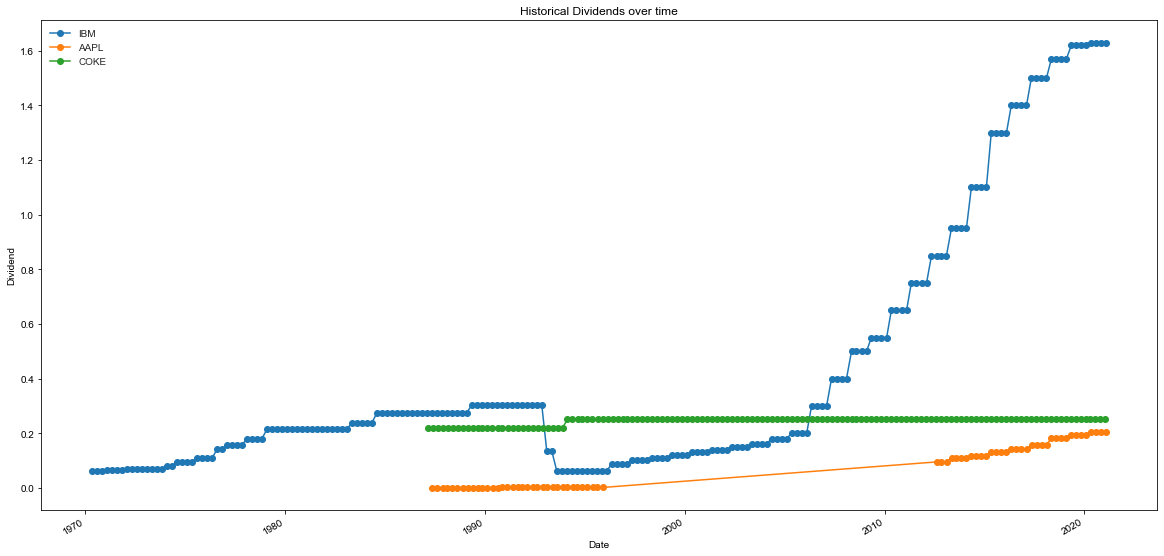

In [4]:
# GET STOCKS' HISTORICAL DIVIDENDS AND PLOT THEM OVER TIME, ON THE SAME CHART
stock_1 = 'IBM'
stock_2 = 'AAPL'
stock_3 = 'COKE'

stock_1_dividend = si.get_dividends(stock_1, index_as_date = False) #False so the date is in a column rather than the index of the dataframe
stock_2_dividend = si.get_dividends(stock_2, index_as_date = False)
stock_3_dividend = si.get_dividends(stock_3, index_as_date = False)

df = pd.DataFrame(stock_1_dividend,columns=['date','dividend'])
# df.plot(x ='date', y='dividend', kind = 'line', figsize=(20,10))

df1 = pd.DataFrame(stock_2_dividend,columns=['date','dividend'])
# df1.plot(x ='date', y='dividend', kind = 'line', figsize=(20,10))

df2 = pd.DataFrame(stock_3_dividend,columns=['date','dividend'])
# df2.plot(x ='date', y='dividend', kind = 'line', figsize=(20,10))

ax = df.plot(x='date', y='dividend', figsize=(20,10), marker='o')
df1.plot(ax=ax, x='date', y='dividend', figsize=(20,10), marker='o')
df2.plot(ax=ax, x='date', y='dividend', figsize=(20,10), marker='o')
plt.style.use('seaborn-whitegrid')
ax.set_xlabel('Date')
ax.set_ylabel('Dividend')
ax.set_title("Historical Dividends over time")
ax.legend([stock_1, stock_2,stock_3])
plt.show()

In [19]:
# CALCULATE COMPOUND INTEREST OVER N TIME, SHOW VALUE FOR EACH YEAR

m = []
for i in range(11):
    m.append(i)
print("ARRAY: " f'm={m}')

years = m

for x in years:
    principle = 1000
    rate = 0.10
    compound_periods = 1
    
    FV = principle*(1+(rate/compound_periods))**(x*compound_periods)
    
    print("Final Value Year " '{:0,.0f}' ": " '${:0,.0f}'.format(x, FV))

ARRAY: m=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Final Value Year 0: $1,000
Final Value Year 1: $1,100
Final Value Year 2: $1,210
Final Value Year 3: $1,331
Final Value Year 4: $1,464
Final Value Year 5: $1,611
Final Value Year 6: $1,772
Final Value Year 7: $1,949
Final Value Year 8: $2,144
Final Value Year 9: $2,358
Final Value Year 10: $2,594


In [14]:
# COMPOUND INTEREST CALCULATOR WITH OPTION OF REGULAR CONTRIBUTIONS

from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual, Layout, IntSlider, Label
import ipywidgets as widgets

style = {'description_width': 'initial'}

@interact(principle=widgets.IntSlider(min=0, max=1000000, step=10000, value=10000, layout=Layout(width='650px'), style=style, readout_format='$'),
          rate=widgets.FloatSlider(min=0.01, max=.20, step=0.01, value=0.08, layout=Layout(width='650px'), style=style,vreadout_format='%'),
          compound_periods=[('Annually',1), ('Quarterly',4),('Monthly', 12), ('Bi-weekly',26), ('Weekly', 52), ('Daily', 365)],
          time=widgets.IntSlider(min=0, max=100, step=1, value=10, layout=Layout(width='650px'), style=style),
          contribution_frequency=[('Annually',1), ('Quarterly',4),('Monthly', 12), ('Bi-weekly',26), ('Weekly', 52), ('Daily', 365)],
          contribution_amount=widgets.IntSlider(min=0, max=5000, step=500, value=0, layout=Layout(width='650px'), style=style, readout_format='$'))

def g(principle=10000, rate=0.01, compound_periods='yearly', time=10, contribution_frequency='monthly', contribution_amount=1000):

    i = principle*(1+(rate/compound_periods))**(time*compound_periods)  #compound interest
    j = contribution_amount*((((1+(rate/contribution_frequency))**(time*contribution_frequency)) - 1)/(rate/contribution_frequency))  ## periodic payment
    g = i + j

    return ("FINAL AMOUNT: " '${:0,.0f}'.format(g), "Monthly Passive Income: " '${:0,.0f}'.format(g*.04/12))

# TODO

# - Get the text box descriptions visible

interactive(children=(IntSlider(value=10000, description='principle', layout=Layout(width='650px'), max=100000…